# Customer Churn Savings Bank - EDA

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotnine as p9

import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_csv("../data/Tabla_01_English.csv", sep =",", encoding= "latin1", index_col=0, parse_dates=True) # encoding Spanish alphabet into English; creating timestamps

## Inspecting features

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15235 entries, 2018-01-31 to 2021-05-31
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Client_ID                              15235 non-null  int64  
 1   Resident_Capital                       15235 non-null  int64  
 2   Client_Age_Years                       15235 non-null  int64  
 3   Client_Sex                             15235 non-null  int64  
 4   Client_Married                         15235 non-null  int64  
 5   Amount_Last_Disbursement               15235 non-null  float64
 6   n(Months)_Since_Last_Disbursement      15235 non-null  int64  
 7   n(Months)_Client_Relationship          15235 non-null  int64  
 8   n(Months)_LO_Active_Employee           15235 non-null  int64  
 9   Client_Status_Post3Months              15235 non-null  int64  
 10  Client_Status_Post6Months              15235 non-null

In [4]:
df.head(3)

,Client_ID,Resident_Capital,Client_Age_Years,Client_Sex,Client_Married,Amount_Last_Disbursement,n(Months)_Since_Last_Disbursement,n(Months)_Client_Relationship,n(Months)_LO_Active_Employee,Client_Status_Post3Months,...,n(Loans)_Outstanding_Other,n(Additional_Loans)_Post3Months,n(Additional_Loans)_Post6Months,Total_Accumulated_Interest_per_Client,LO_Active_Employee_Prior3Months,LO_Active_Employee_Prior6Months,n(Additional_Loans)_Pre3Months,n(Additional_Loans)_Pre6Months,LO_Changed,n(Months)_Change_LO
Fecha Cierre,,,,,,,,,,,,,,,,,,,,,
2018-01-31,1090100000183,1,67,1,0,66500.0,57,74,19,0,...,2,0,0,19,1,1,0,0,1,13
2018-01-31,1090100003778,1,59,1,1,22000.0,0,81,45,1,...,1,0,0,127,1,1,1,1,0,0
2018-01-31,1090100003930,1,65,1,0,18000.0,1,31,24,1,...,2,0,0,0,1,1,1,1,0,0


In [5]:
df.shape

(15235, 24)

In [6]:
df.isna().sum()

Client_ID                                0
Resident_Capital                         0
Client_Age_Years                         0
Client_Sex                               0
Client_Married                           0
Amount_Last_Disbursement                 0
n(Months)_Since_Last_Disbursement        0
n(Months)_Client_Relationship            0
n(Months)_LO_Active_Employee             0
Client_Status_Post3Months                0
Client_Status_Post6Months                0
LO_Active_Employee_Post3Months           0
LO_Active_Employee_Post6Months           0
n(Loans)_Outstanding_Maynas              0
n(Loans)_Outstanding_Other               0
n(Additional_Loans)_Post3Months          0
n(Additional_Loans)_Post6Months          0
Total_Accumulated_Interest_per_Client    0
LO_Active_Employee_Prior3Months          0
LO_Active_Employee_Prior6Months          0
n(Additional_Loans)_Pre3Months           0
n(Additional_Loans)_Pre6Months           0
LO_Changed                               0
n(Months)_C

## EDA - features

EDA will be done based on two perspectives:
- financial data
- data related to socioeconomic factors

=> for this: creation of time-related vars ("month" and "year")

In [7]:
# Create additional cols for plotting: "month", "year"
df["Year"] = df.index.year
df["Month"] = df.index.month
df.head(3)

,Client_ID,Resident_Capital,Client_Age_Years,Client_Sex,Client_Married,Amount_Last_Disbursement,n(Months)_Since_Last_Disbursement,n(Months)_Client_Relationship,n(Months)_LO_Active_Employee,Client_Status_Post3Months,...,n(Additional_Loans)_Post6Months,Total_Accumulated_Interest_per_Client,LO_Active_Employee_Prior3Months,LO_Active_Employee_Prior6Months,n(Additional_Loans)_Pre3Months,n(Additional_Loans)_Pre6Months,LO_Changed,n(Months)_Change_LO,Year,Month
Fecha Cierre,,,,,,,,,,,,,,,,,,,,,
2018-01-31,1090100000183,1,67,1,0,66500.0,57,74,19,0,...,0,19,1,1,0,0,1,13,2018,1
2018-01-31,1090100003778,1,59,1,1,22000.0,0,81,45,1,...,0,127,1,1,1,1,0,0,2018,1
2018-01-31,1090100003930,1,65,1,0,18000.0,1,31,24,1,...,0,0,1,1,1,1,0,0,2018,1


#### EDA - number of loans outstanding with SB (at each cut-off date) => "frequency"

<AxesSubplot:xlabel='Year,Month'>

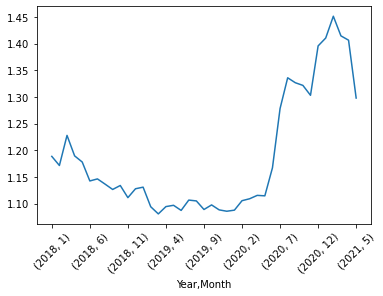

In [8]:
p3 = df.groupby(["Year","Month"])["n(Loans)_Outstanding_Maynas"].mean().plot() 
plt.xticks(rotation=45)
p3

### The number of transactions of SME clients with the SB have increased strongly since the year 2020.
* in the year 2021 transactions plummet. Maintained outliers. 

#### EDA - number of loans outstanding with in other financial institutions (at each cut-off date) => "frequency"

<AxesSubplot:xlabel='Year,Month'>

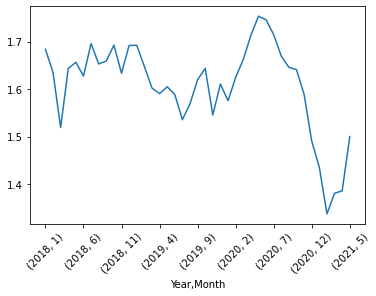

In [9]:
p4 = df.groupby(["Year","Month"])["n(Loans)_Outstanding_Other"].mean().plot() 
plt.xticks(rotation=45)
p4

### The number of transactions of SME clients of the SB with other institutions have decreased strongly since the year 2020.
* in the year 2021 these transactions skyrocket. Maintained outliers. 

#### EDA - amount of last disbursements (at each cut-off date) => "monetary"

<AxesSubplot:xlabel='Year,Month'>

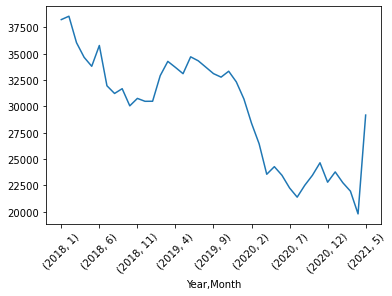

In [10]:
p5 = df.groupby(["Year","Month"])["Amount_Last_Disbursement"].mean().plot() 
plt.xticks(rotation=45)
p5

### During the time period between 2018 and May 2021 the amounts disbursed to SME clients tended to decrease.
* trend changes in april 2021. Maintained outliers. 

#### EDA - total accumulated interest since last disbursement, per client (at each cut-off date) => "monetary"

<AxesSubplot:xlabel='Year,Month'>

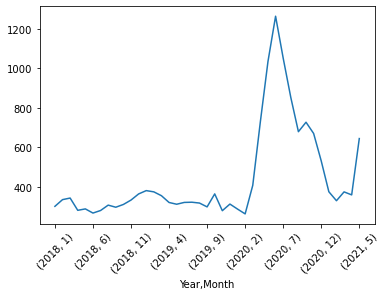

In [11]:
p6 = df.groupby(["Year", "Month"])["Total_Accumulated_Interest_per_Client"].mean().plot()
plt.xticks(rotation=45)
p6

### Accumulated interest skyrockets at the beginning of 2020 and decreases sharply in the course of the year to pre 2020 levels.
* in the year 2021 interest accumulated skyrockets again. Maintained outliers. 

In [12]:
# drop time-related cols again
df.drop(["Year", "Month"], axis = 1, inplace = True)

#### EDA - socioeconomic features 

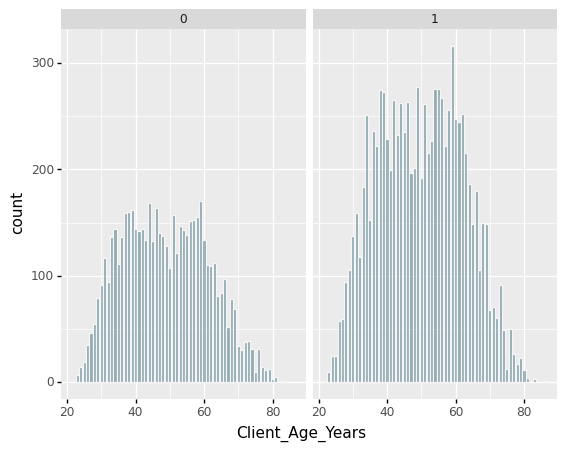

<ggplot: (8770332216938)>

In [13]:
(p9.ggplot(data=df,
           mapping=p9.aes(x="Client_Age_Years")
                       )
    + p9.geom_bar(
       alpha=0.4,
        color='#F6F6F6', 
        fill='#0C475B')
    + p9.facet_wrap("Client_Status_Post3Months")
)

Result not intuitive, since the majority group are customers that do not churn. I conclude that churn has been encoded wrongly. Hence, re-enconding churn as "1":

In [14]:
df["Client_Status_Post3Months"].unique

<bound method Series.unique of Fecha Cierre
2018-01-31    0
2018-01-31    1
2018-01-31    1
2018-01-31    1
2018-01-31    1
             ..
2021-05-31    0
2021-05-31    0
2021-05-31    0
2021-05-31    0
2021-05-31    0
Name: Client_Status_Post3Months, Length: 15235, dtype: int64>

In [15]:
df["Client_Status_Post3Months"] = df["Client_Status_Post3Months"].replace({0:1, 1:0})

In [16]:
df["Client_Status_Post3Months"].unique

<bound method Series.unique of Fecha Cierre
2018-01-31    1
2018-01-31    0
2018-01-31    0
2018-01-31    0
2018-01-31    0
             ..
2021-05-31    1
2021-05-31    1
2021-05-31    1
2021-05-31    1
2021-05-31    1
Name: Client_Status_Post3Months, Length: 15235, dtype: int64>

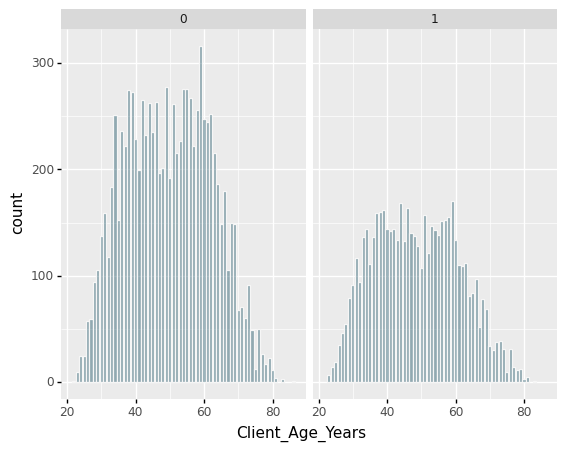

<ggplot: (8770331850081)>

In [17]:
(p9.ggplot(data=df,
           mapping=p9.aes(x="Client_Age_Years")
                       )
    + p9.geom_bar(
       alpha=0.4,
        color='#F6F6F6', 
        fill='#0C475B')
    + p9.facet_wrap("Client_Status_Post3Months")
)

Now it makes sense: distribution of minority group shows less counts compared to majority group.

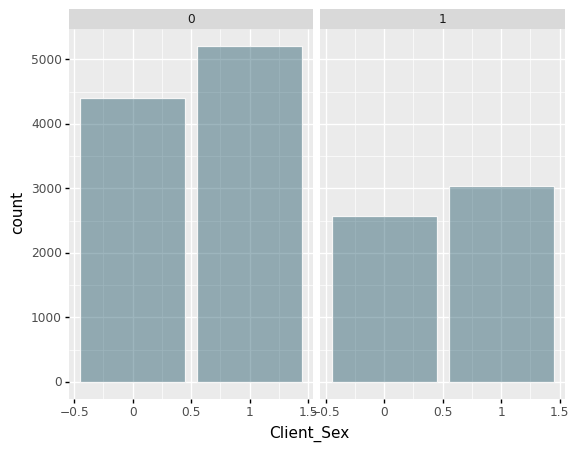

<ggplot: (8770315108090)>

In [18]:
(p9.ggplot(data=df,
          mapping=p9.aes(x="Client_Sex")
                       )
    + p9.geom_bar(
       alpha=0.4,
       color='#F6F6F6', 
        fill='#0C475B')
    + p9.facet_wrap("Client_Status_Post3Months")
)

Gender has been encoded as: "1" women...resulting plot makes sense, since proportion of male clients is higher in practice.

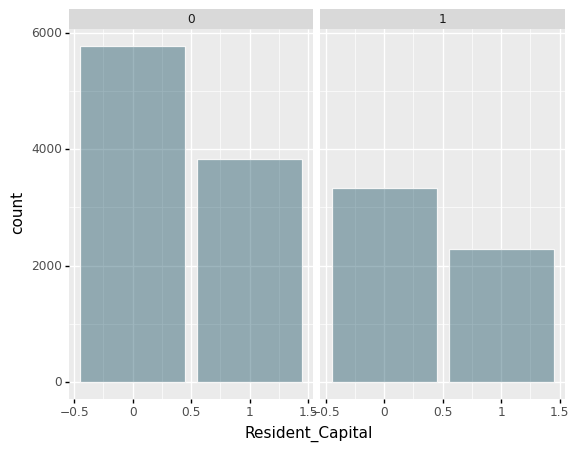

<ggplot: (8770332251405)>

In [19]:
(p9.ggplot(data=df,
          mapping=p9.aes(x="Resident_Capital")
                       )
    + p9.geom_bar(
       alpha=0.4,
       color='#F6F6F6', 
       fill='#0C475B')
    + p9.facet_wrap("Client_Status_Post3Months")
)

Intuitive: 
- minority group has less counts than majority group
- for both groups: the majority of counts are masculine customers
- for both genders: most of the customers in the portfolio are clients that actually live in the capital city


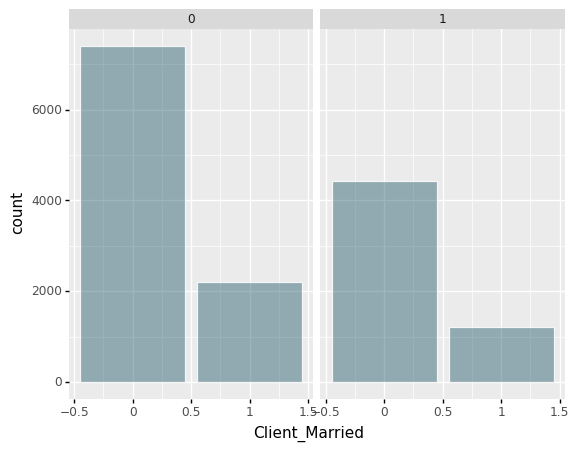

<ggplot: (8770315228031)>

In [20]:
(p9.ggplot(data=df,
          mapping=p9.aes(x="Client_Married")
                       )
   + p9.geom_bar(
       alpha=0.4,
       color='#F6F6F6', 
       fill='#0C475B')
    + p9.facet_wrap("Client_Status_Post3Months")
)

Intuitive: 
- same interpretation as prior bar plot - only re marital status of customers.

## EDA - correlation between features and target ("client status")

<AxesSubplot:>

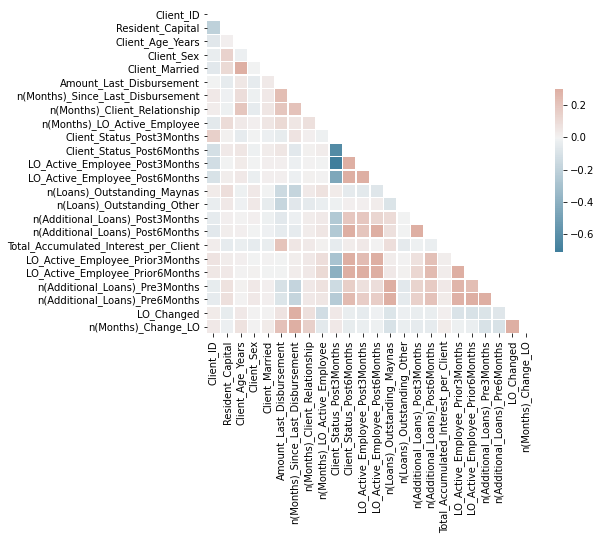

In [21]:
corr = df.corr()

mask = np.triu(np.ones_like(corr, dtype=bool))

f, ax = plt.subplots(figsize=(8, 6))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
             square=True, linewidths=.5, cbar_kws={"shrink": .5})

"Zooming in"...

In [22]:
df_RFM = df.drop(["Resident_Capital", "Client_Age_Years","Client_Sex", "Client_Married","LO_Active_Employee_Post3Months",
                 "LO_Active_Employee_Post6Months", "LO_Active_Employee_Prior3Months", "LO_Active_Employee_Prior6Months",
                 "LO_Changed", "n(Months)_Change_LO"], axis = 1)

<AxesSubplot:>

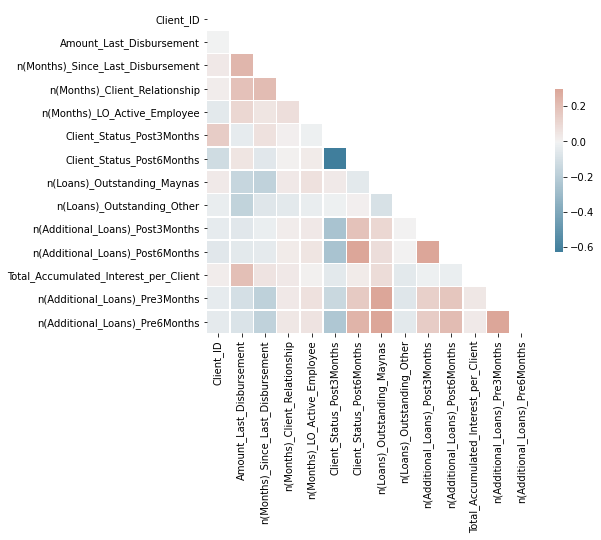

In [23]:
corr_RFM = df_RFM.corr()

mask = np.triu(np.ones_like(corr_RFM, dtype=bool))

f, ax = plt.subplots(figsize=(8, 6))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_RFM, mask=mask, cmap=cmap, vmax=.3, center=0,
             square=True, linewidths=.5, cbar_kws={"shrink": .5})

Socioeconomic variables and target variable do not show high correlations.

In [24]:
df_RFM = df_LO = df.drop(["Resident_Capital", "Client_Age_Years","Client_Sex", "Client_Married","Amount_Last_Disbursement",
                 "n(Months)_Since_Last_Disbursement", "n(Loans)_Outstanding_Maynas", "n(Loans)_Outstanding_Other",
                 "n(Additional_Loans)_Post3Months", "n(Additional_Loans)_Post6Months", "Total_Accumulated_Interest_per_Client",
                 "n(Additional_Loans)_Pre3Months", "n(Additional_Loans)_Pre6Months"]      
                 , axis = 1)

<AxesSubplot:>

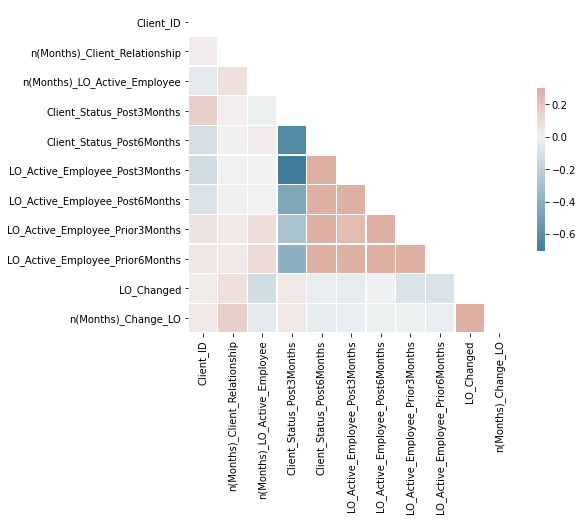

In [25]:
corr_LO = df_LO.corr()

mask = np.triu(np.ones_like(corr_LO, dtype=bool))

f, ax = plt.subplots(figsize=(8, 6))

cmap = sns.diverging_palette(230, 20, as_cmap=True)

sns.heatmap(corr_LO, mask=mask, cmap=cmap, vmax=.3, center=0,
             square=True, linewidths=.5, cbar_kws={"shrink": .5})

### Main correlations between features and the target variable are found with those variables that describe relationship between clients and their Loan Officers!

## Checking for class imbalance

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 15235 entries, 2018-01-31 to 2021-05-31
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Client_ID                              15235 non-null  int64  
 1   Resident_Capital                       15235 non-null  int64  
 2   Client_Age_Years                       15235 non-null  int64  
 3   Client_Sex                             15235 non-null  int64  
 4   Client_Married                         15235 non-null  int64  
 5   Amount_Last_Disbursement               15235 non-null  float64
 6   n(Months)_Since_Last_Disbursement      15235 non-null  int64  
 7   n(Months)_Client_Relationship          15235 non-null  int64  
 8   n(Months)_LO_Active_Employee           15235 non-null  int64  
 9   Client_Status_Post3Months              15235 non-null  int64  
 10  Client_Status_Post6Months              15235 non-null

In [27]:
y = df["Client_Status_Post3Months"]

In [28]:
(y == 1).sum(), (y == 0).sum() 

(5624, 9611)

In [29]:
y.value_counts()/df.shape[0]

0    0.63085
1    0.36915
Name: Client_Status_Post3Months, dtype: float64

5.624 counts of clients who have left the SB after 3 months (for each cut-off date) <=>  37% of all clients. This is problematic:
- based on a separate analysis, one concludes that monthly average in the established time period is approx. 2%. 37% for churn simply is unrealistic.
- while extracting data from database, most probably some registers were duplicated manually. If so  => extract them.

## Checking for duplicates

In [30]:
df2 = df.groupby(["Client_Status_Post3Months"]).agg({"Client_ID" : "nunique", "Resident_Capital" : "count"})
df2 = df2.reset_index()
df2 = df2.rename(columns={"Client_ID" : "Unique_Frequency", "Resident_Capital" : "Frequency"})
df2

,Client_Status_Post3Months,Unique_Frequency,Frequency
0,0,3243,9611
1,1,3335,5624


In [31]:
check_duplicates = np.array(df2)
check_duplicates

array([[   0, 3243, 9611],
       [   1, 3335, 5624]])

In [32]:
prop_duplicates = check_duplicates[0,1]/check_duplicates[0,2]*100
prop_duplicates

33.742586619498496

Confirming high number of duplicates. Need to extract them.

In [33]:
df_unique = df.drop_duplicates(subset="Client_ID", keep="first") 

In [34]:
df_unique.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 4304 entries, 2018-01-31 to 2021-05-31
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   Client_ID                              4304 non-null   int64  
 1   Resident_Capital                       4304 non-null   int64  
 2   Client_Age_Years                       4304 non-null   int64  
 3   Client_Sex                             4304 non-null   int64  
 4   Client_Married                         4304 non-null   int64  
 5   Amount_Last_Disbursement               4304 non-null   float64
 6   n(Months)_Since_Last_Disbursement      4304 non-null   int64  
 7   n(Months)_Client_Relationship          4304 non-null   int64  
 8   n(Months)_LO_Active_Employee           4304 non-null   int64  
 9   Client_Status_Post3Months              4304 non-null   int64  
 10  Client_Status_Post6Months              4304 non-null  

=> data set reduced by one third after dropping duplicates!

In [35]:
df_unique.shape

(4304, 24)

In [36]:
y = df_unique["Client_Status_Post3Months"]

In [37]:
y.value_counts()/df_unique.shape[0]

0    0.593169
1    0.406831
Name: Client_Status_Post3Months, dtype: float64

Unintuitive: data set is not imbalanced. Can't achieve extraction of duplicates. However => continue analysis with this data set.

Preparing dataset for training models:

In [38]:
df_unique.head()

,Client_ID,Resident_Capital,Client_Age_Years,Client_Sex,Client_Married,Amount_Last_Disbursement,n(Months)_Since_Last_Disbursement,n(Months)_Client_Relationship,n(Months)_LO_Active_Employee,Client_Status_Post3Months,...,n(Loans)_Outstanding_Other,n(Additional_Loans)_Post3Months,n(Additional_Loans)_Post6Months,Total_Accumulated_Interest_per_Client,LO_Active_Employee_Prior3Months,LO_Active_Employee_Prior6Months,n(Additional_Loans)_Pre3Months,n(Additional_Loans)_Pre6Months,LO_Changed,n(Months)_Change_LO
Fecha Cierre,,,,,,,,,,,,,,,,,,,,,
2018-01-31,1090100000183,1,67,1,0,66500.0,57,74,19,1,...,2,0,0,19,1,1,0,0,1,13
2018-01-31,1090100003778,1,59,1,1,22000.0,0,81,45,0,...,1,0,0,127,1,1,1,1,0,0
2018-01-31,1090100003930,1,65,1,0,18000.0,1,31,24,0,...,2,0,0,0,1,1,1,1,0,0
2018-01-31,1090100004430,1,73,0,0,4000.0,0,76,35,0,...,1,1,1,582,1,1,1,2,0,0
2018-01-31,1090100009032,1,81,1,0,6000.0,2,10,24,0,...,3,0,0,56,1,1,1,1,0,0


In [39]:
df_unique.shape

(4304, 24)

In [40]:
df_unique.to_csv("Tabla_01_English_Unique_postEDA.csv")